In [106]:
import pandas as pd
import numpy as np


In [107]:
ap_data = pd.read_excel("all_data_model.xlsx")

In [108]:
ap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 18 columns):
date              672 non-null datetime64[ns]
all_num           672 non-null int64
temp              672 non-null float64
humid             672 non-null float64
co2               672 non-null float64
voc               672 non-null float64
pm25              672 non-null float64
light             672 non-null float64
noise             672 non-null float64
기온                672 non-null float64
강수량               672 non-null float64
풍속                672 non-null float64
습도                672 non-null int64
date_day          672 non-null int64
date_hour         672 non-null int64
date_weekday      672 non-null int64
model_number_1    672 non-null float64
model_number_2    672 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(5)
memory usage: 94.6 KB


In [109]:
ap_data.set_index(ap_data['date'], inplace=True)

In [110]:
ap_data

,date,all_num,temp,humid,co2,voc,pm25,light,noise,기온,강수량,풍속,습도,date_day,date_hour,date_weekday,model_number_1,model_number_2
date,,,,,,,,,,,,,,,,,,
2019-09-20 00:00:00,2019-09-20 00:00:00,1,25.7250,41.9375,4168.2000,561.1625,2.9250,135.3625,50.1000,18.8,0.0,1.5,73,20,0,4,1.620556,1.778791
2019-09-20 01:00:00,2019-09-20 01:00:00,0,25.8750,43.3125,3699.7375,531.6500,3.2750,0.0000,50.0875,19.1,0.0,0.2,72,20,1,4,0.000000,0.000000
2019-09-20 02:00:00,2019-09-20 02:00:00,0,26.0375,43.9500,3313.8625,508.0750,3.6500,0.0000,50.0750,17.8,0.0,0.2,85,20,2,4,0.000000,0.000000
2019-09-20 03:00:00,2019-09-20 03:00:00,0,25.6625,46.5750,2379.5625,403.8250,4.6625,171.5125,51.7000,17.5,0.0,0.1,87,20,3,4,0.000000,0.000000
2019-09-20 04:00:00,2019-09-20 04:00:00,0,25.4250,48.7875,1008.6500,209.7375,6.8500,0.0000,50.2250,17.3,0.0,0.0,86,20,4,4,0.000000,0.000000
2019-09-20 05:00:00,2019-09-20 05:00:00,0,25.5375,50.3375,472.6750,81.7000,7.6250,0.0000,50.3500,17.6,0.0,1.4,83,20,5,4,0.000000,0.000000
2019-09-20 06:00:00,2019-09-20 06:00:00,0,25.2125,52.3500,408.5875,66.9000,7.4375,1.0375,51.0000,17.9,0.0,2.2,80,20,6,4,0.000000,0.000000
2019-09-20 07:00:00,2019-09-20 07:00:00,4,24.7625,55.1500,427.7750,64.6250,6.2250,391.4625,51.7125,17.3,0.0,0.9,84,20,7,4,6.482226,7.115166
2019-09-20 08:00:00,2019-09-20 08:00:00,10,25.1375,55.2500,545.8000,104.3125,5.5875,433.3875,52.1750,18.2,0.0,1.1,82,20,8,4,16.205565,17.787914


Text(0, 0.5, '대여횟수')

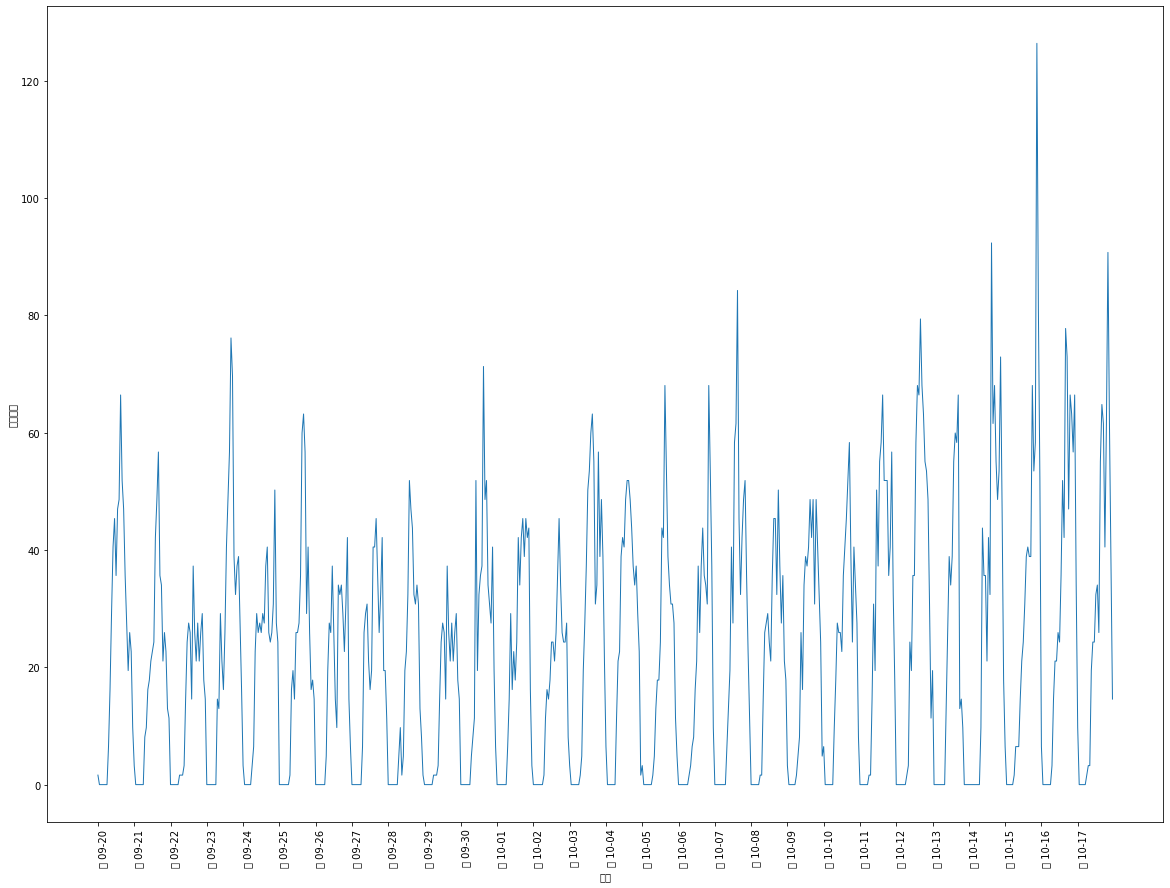

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20,15))
xticks = pd.date_range(start = '2019-09-20', end ='2019-10-17')
week  = ["일","월","화","수","목","금","토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"),
                                             xticks.strftime(" %m-%d"))]

plt.xticks(xticks, xticks_name, rotation = 90, ha = "left")
plt.plot(ap_data['model_number_1'],linewidth = 1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

In [112]:
from sklearn.preprocessing import minmax_scale

df = pd.DataFrame()
df['date'] = ap_data['date']
df['model_number_1'] = minmax_scale(ap_data['model_number_1'], axis=0, copy=True)
df['humid']= minmax_scale(ap_data['humid'], axis=0, copy=True)
df['hour']= minmax_scale(ap_data['date_hour'], axis=0, copy=True)
df['weekday']= minmax_scale(ap_data['date_weekday'], axis=0, copy=True)
df['temp']= minmax_scale(ap_data['temp'], axis=0, copy=True)
df['기온']= minmax_scale(ap_data['기온'], axis=0, copy=True)
df['습도']= minmax_scale(ap_data['습도'], axis=0, copy=True)
df['강수량']= minmax_scale(ap_data['강수량'], axis=0, copy=True)
df['풍속']= minmax_scale(ap_data['풍속'], axis=0, copy=True)
df['voc']= minmax_scale(ap_data['voc'], axis=0, copy=True)
df['co2']= minmax_scale(ap_data['co2'], axis=0, copy=True)
df['pm25']= minmax_scale(ap_data['pm25'], axis=0, copy=True)
df['light']= minmax_scale(ap_data['light'], axis=0, copy=True)
df['noise']= minmax_scale(ap_data['noise'], axis=0, copy=True)

df.set_index(df['date'], inplace=True)

In [113]:
y = df['model_number_1']
X = df.index.astype("int64").values.reshape(-1,1)

In [114]:
n_train = 470

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train,y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train,y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize = (15,15))
    
    plt.xticks(range(0, len(X), 8), xticks_name, rotation = 90, ha="left")
    
    plt.plot(range(n_train), y_train, label = "훈련")
    plt.plot(range(n_train, len(y_test) +  n_train), y_test, '-', label = "테스트")
    plt.plot(range(n_train), y_pred_train, '--', label = "훈련 예측")
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label = "테스트 예측")
    plt.legend(loc = (1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")
    

테스트 세트 R^2: -0.11


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-p

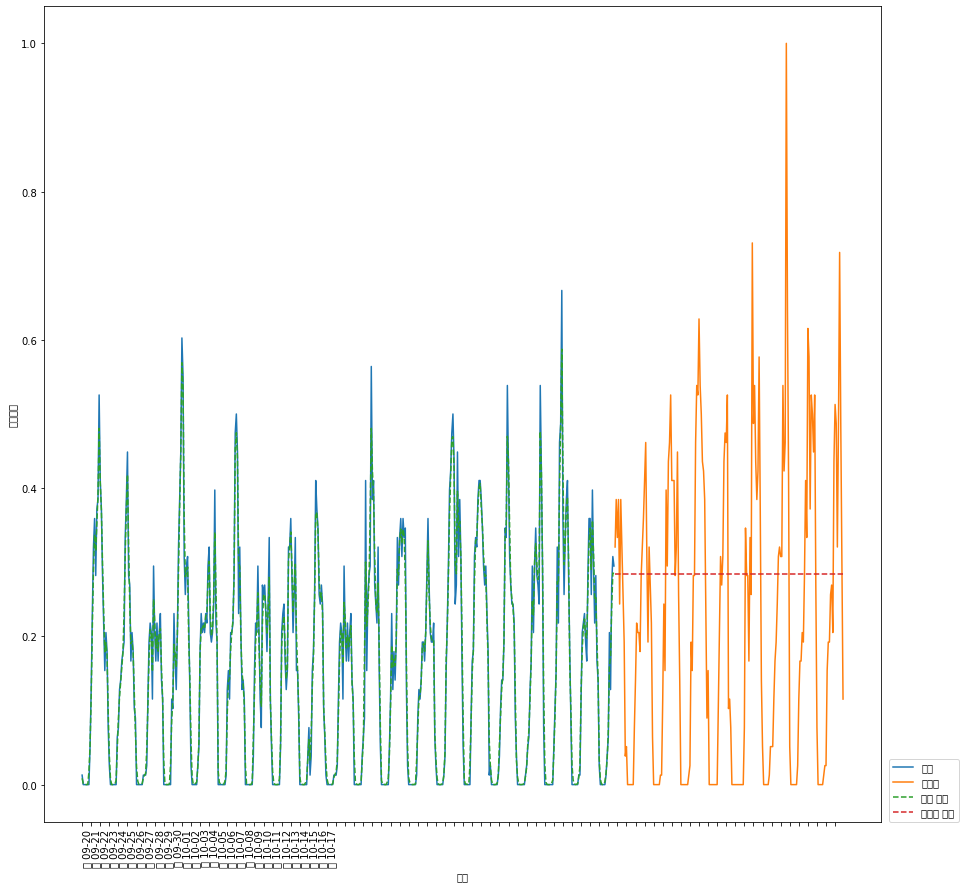

In [115]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
eval_on_features(X,y, regressor)


In [116]:
# X_hour = ap_data.index.hour.values.reshape(-1,1)
# eval_on_features(X_hour, y, regressor)

테스트 세트 R^2: 0.63


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-p

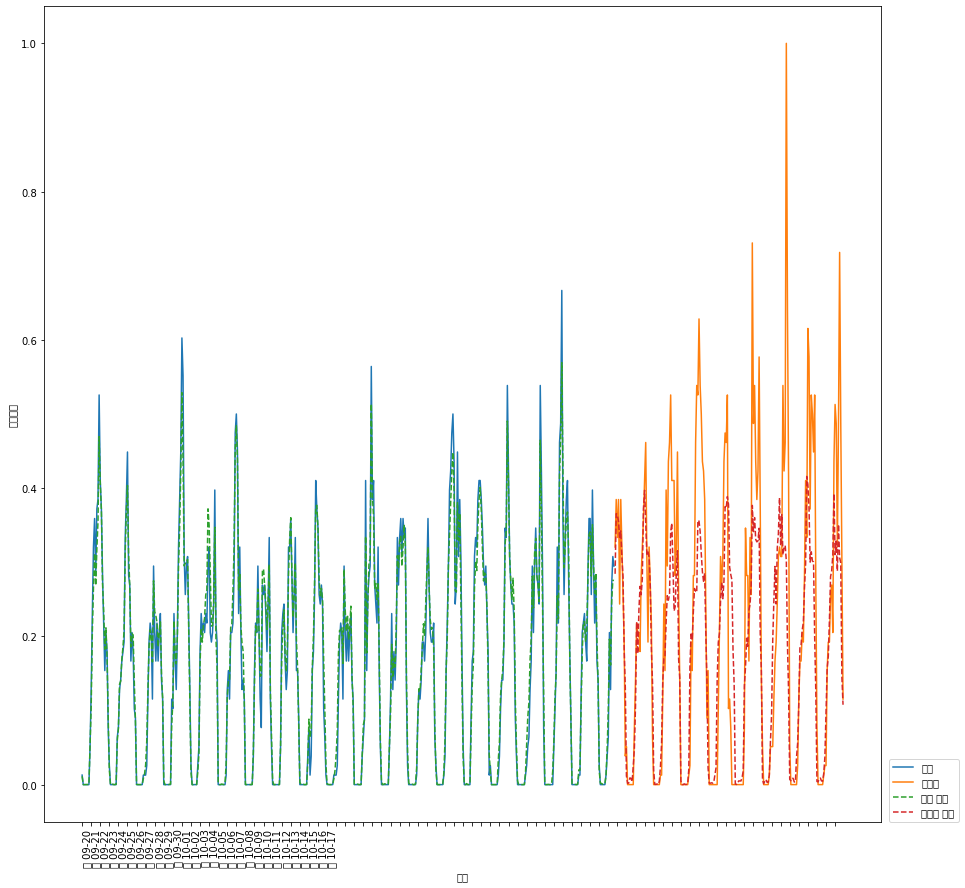

In [117]:

X_hour_week = np.hstack([df.hour.values.reshape(-1,1), df.기온.values.reshape(-1,1),
                        df.습도.values.reshape(-1,1),df.temp.values.reshape(-1,1),
                         df.light.values.reshape(-1,1)])
                              
eval_on_features(X_hour_week, y, regressor)


# X_hour_week = np.hstack([ ap_data.index.hour.values.reshape(-1,1),ap_data.index.dayofweek.values.reshape(-1,1),
#                          ap_data.index.day.values.reshape(-1,1), ap_data.humid.values.reshape(-1,1),
#                          ap_data.temp.values.reshape(-1,1),ap_data.기온.values.reshape(-1,1),
#                          ap_data.습도.values.reshape(-1,1),ap_data.강수량.values.reshape(-1,1),
#                          ap_data.풍속.values.reshape(-1,1),ap_data.voc.values.reshape(-1,1),
#                          ap_data.co2.values.reshape(-1,1),ap_data.pm25.values.reshape(-1,1),
#                          ap_data.light.values.reshape(-1,1),ap_data.noise.values.reshape(-1,1) ])
                                             
# eval_on_features(X_hour_week, y, regressor)

테스트 세트 R^2: -26.90


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-p

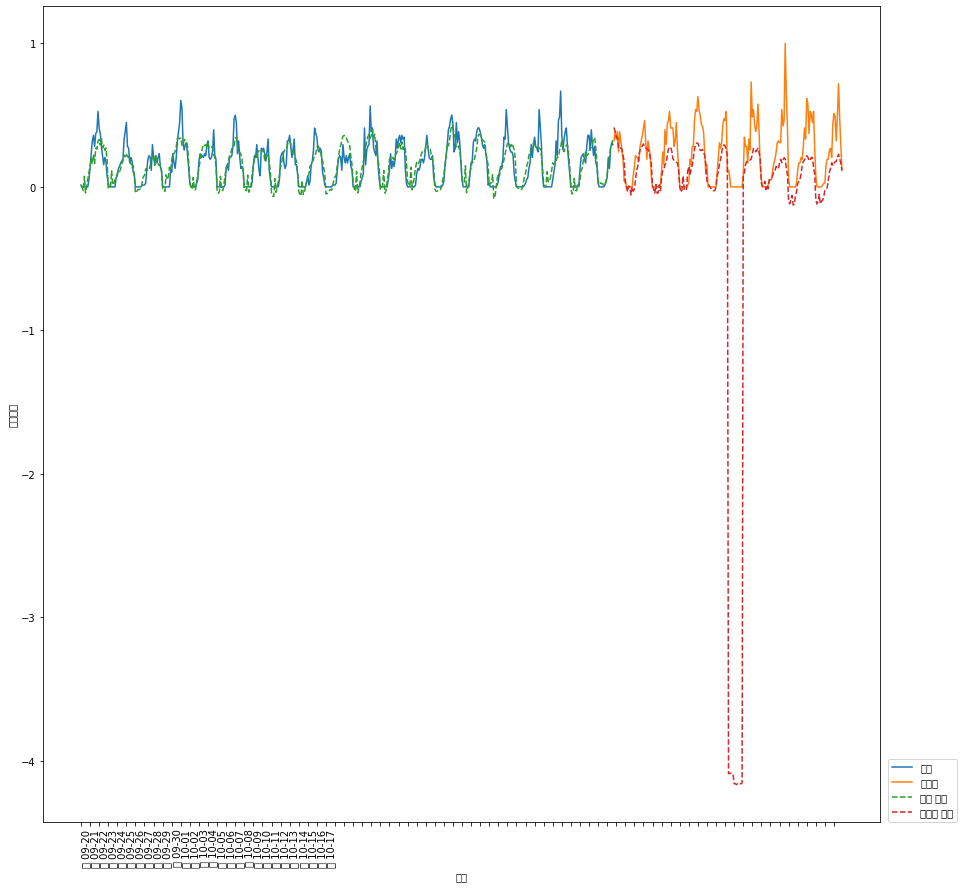

In [98]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

In [99]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


테스트 세트 R^2: -0.08


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-p

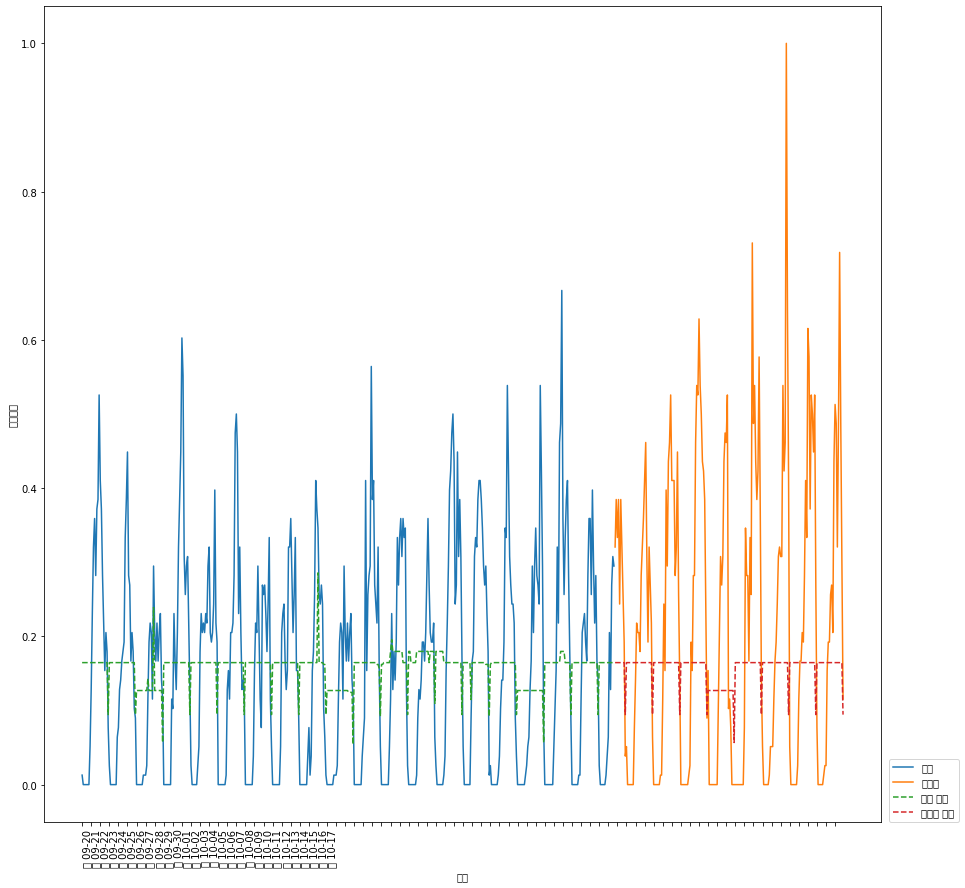

In [100]:
eval_on_features(X_hour_week_onehot, y, Ridge())

테스트 세트 R^2: -0.07


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-p

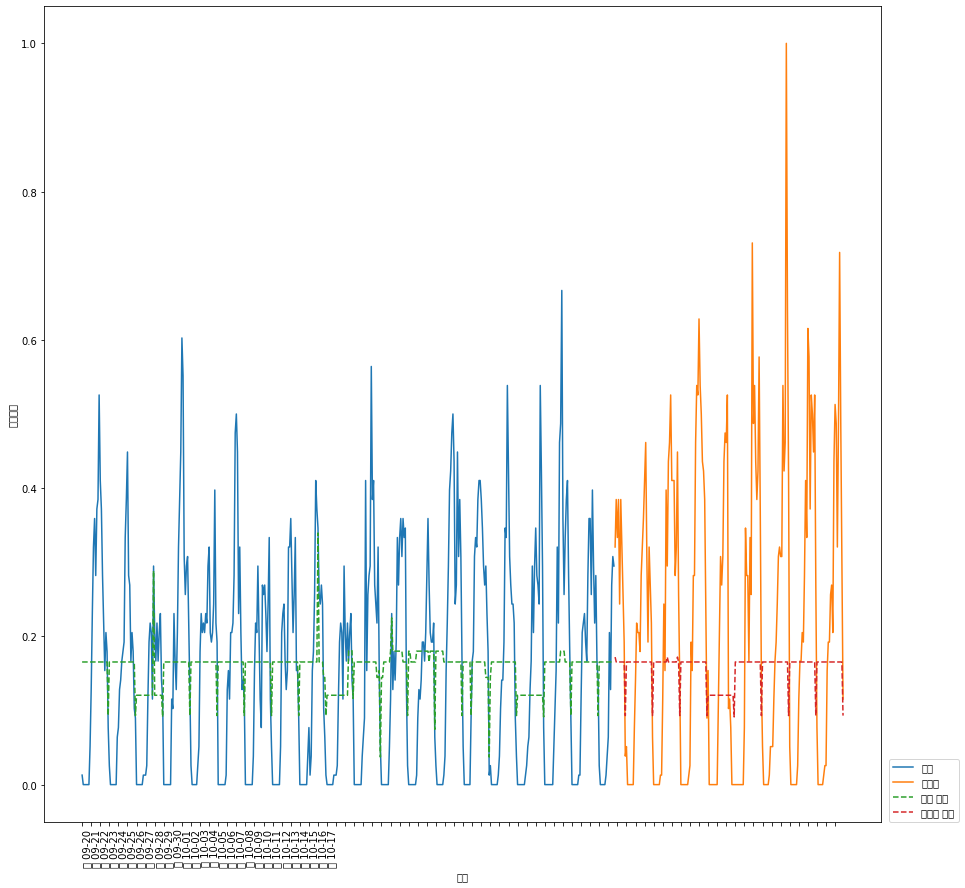

In [101]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [102]:
hour = ["%02d:00" % i for i in range(0, 24, 1)]
day = ["월", "화", "수", "목", "금", "토", "일"]
features =  day + hour

In [103]:
features_poly = poly_transformer.get_feature_names(features) # 모든 상호작용 특성에 이름을 달아줌

# 그리고 계수가 0이 아닌 것만 출력
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, '계수 크기')

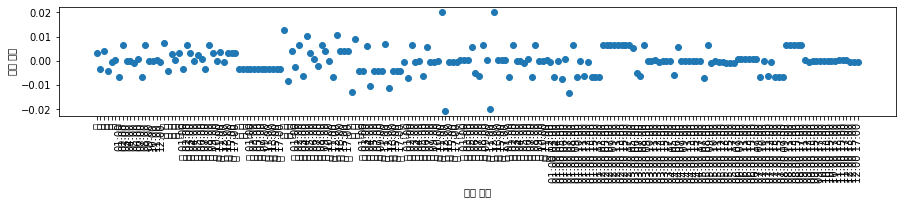

In [105]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")

In [457]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [458]:
X = ap_data.index.astype("int64").values.reshape(-1,1)
y = ap_data['all_num'].values

In [459]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
logreg = LogisticRegression().fit(X_train, y_train)
print("테스트 세트 점수 : {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수 : 0.33


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


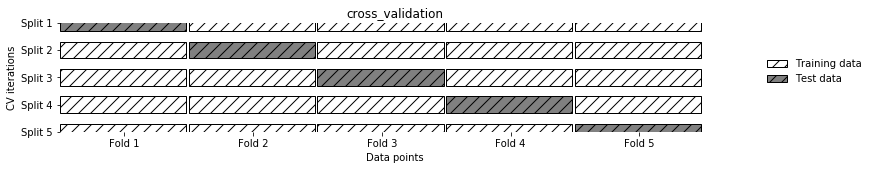

In [460]:
import mglearn
mglearn.plots.plot_cross_validation()

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use e

ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 1.